# Daten

In [1]:
import json
import glob
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None) 

In [2]:
sensor_lst = ['Magnetometer', 'Accelerometer', 'Gyroscope', 'Gravity']

In [23]:
# wide tables and visual
# read one record in csv files form, and join the selected sensors in one dataframe

def read_csvs(path, activity_type, userID):
    df_append = pd.DataFrame()  # an empty dataframe to append the selected csv files
     # folder which includes around 12 csv files of one record
    csv_files = glob.glob(os.path.join(path, "*.csv")) # a list include the exact path of each csv file -> for pd.read_csv()
    
    for i in range(len(csv_files)):
        file_path = csv_files[i] # file path of the i-th csv file
        sensor_name = os.path.splitext(os.path.basename(file_path))[0] # extract the file name as sensor name
        if sensor_name in sensor_lst: # only append the selected files
            df_temp = pd.read_csv(csv_files[i])
            df_temp.columns = [f'{col}_{sensor_name}' for col in df_temp.columns]
            df_temp['activity'] = activity_type
            df_temp['userID'] = userID
                      
    # concat the non-empty DataFrame here
        df_append = pd.concat([df_append, df_temp], ignore_index=True, sort=False)
        df_append = df_append[['sensor', 'time', 'seconds_elapsed', 'x', 'y', 'z', 'activity',
       'userID']]
    return df_append

# read one record in json form
def read_json(path, activity_type, userID):
    df = pd.read_json(path)
    df_append = pd.DataFrame()
    # only keep the selected sensors, and drop the all-nan columns
    df = df[df['sensor'].isin(sensor_lst)].dropna(how='all',axis=1) 
    #df['seconds_elapsed'] = df['seconds_elapsed'].round(3)
    df['seconds_elapsed'] = np.floor(df['seconds_elapsed'] *100)/100
    df['time'] = pd.to_datetime(df['time'])


    for i in range(len(sensor_lst)):
        sensor_ = sensor_lst[i]
        df_temp = df[df['sensor']==sensor_][['time', 'x', 'y', 'z']].set_index('time')
        df_temp.columns = [f'{col}_{sensor_}' for col in df_temp.columns]
        df_append = pd.concat([df_append, df_temp], axis=1)
        
    
    #df_append = df_append.reset_index(drop=False)
    #df_append['seconds_elapsed'] = np.floor(df_append['seconds_elapsed']*100)/100
    #df_append = df_append.set_index('seconds_elapsed')
    
    #df_append = df_append.dropna(how='any',axis=0) 
    df_append['activity'] = activity_type
    df_append['userID'] = userID
    df_append = df_append.dropna(how='all',axis=1)
    #df = df[['sensor', 'time', 'seconds_elapsed', 'x', 'y', 'z', 'activity','userID']] # reorder columns
    return df_append

# visualize sensor data by time
def vis_all_sensors(df):
    col_lst = df.columns[:-2]
    for i in range(int(len(col_lst)/3)):
        col_ = col_lst[3*i:(3*i+3)]
        df[col_].plot(title=f'{df[df.columns[-2]].unique()[0]}_{df[df.columns[-1]].unique()[0]}',figsize=(15,3))
        plt.show()
        
# (np.median(df['seconds_elapsed'])-second_/2 
# (np.median(df['seconds_elapsed'])+second_/2
def time_win(df,min_time,nr):
    # select time window
    # second_: how many seconds will be kept in each dataframe
    df = df.reset_index(drop=False)
    df = df[df['time'] >= min_time]
    return df.head(nr).set_index('seconds_elapsed')

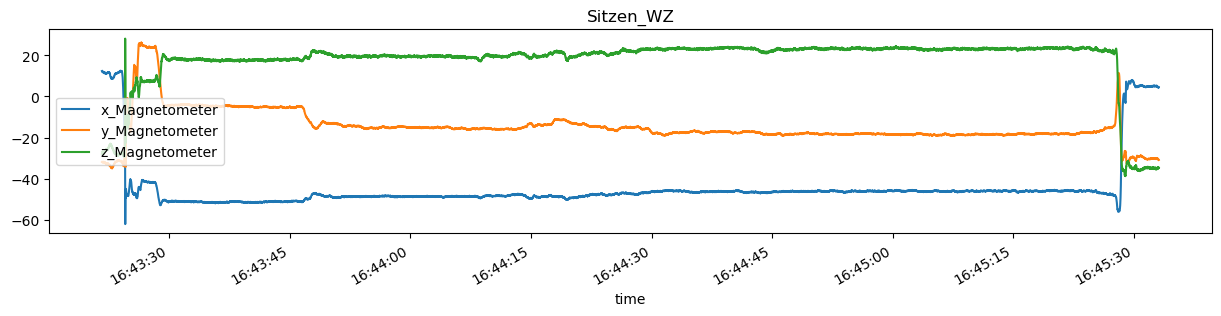

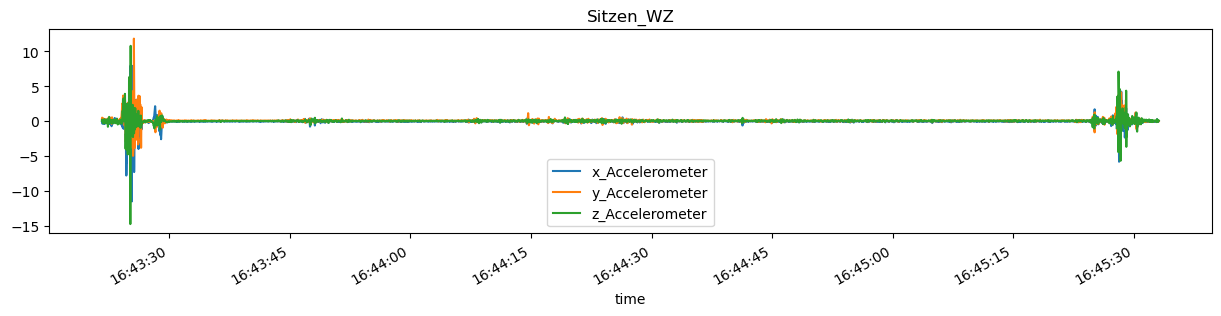

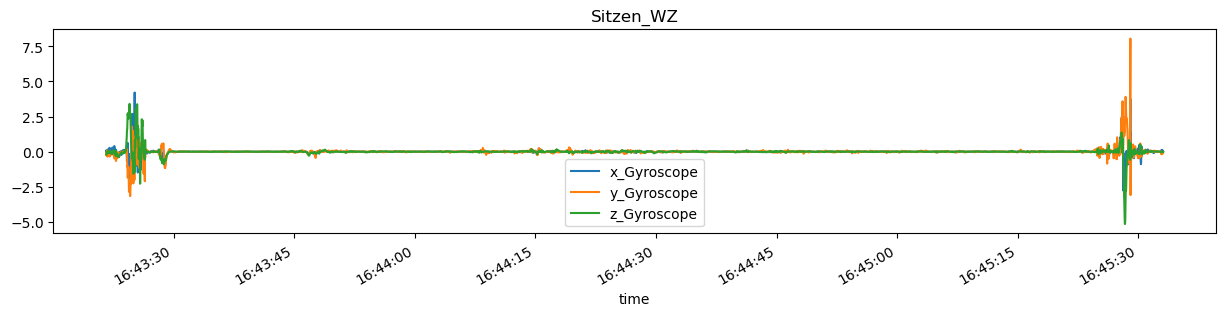

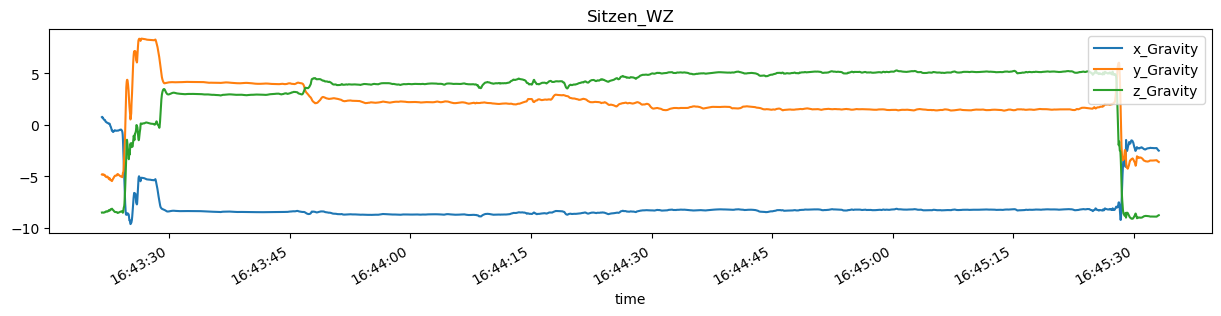

x_Magnetometer  y_Magnetometer  z_Magnetometer  \
time                                                                            
2023-03-10 16:43:21.636778752       12.346863      -31.854065      -27.931526   
2023-03-10 16:43:21.646811904       12.277039      -31.766037      -27.802963   
2023-03-10 16:43:21.656844800       12.269257      -31.740784      -27.777573   
2023-03-10 16:43:21.666877696       12.129211      -31.904572      -27.245605   
2023-03-10 16:43:21.676910848       12.070007      -31.911362      -27.126846   
...                                       ...             ...             ...   
2023-03-10 16:45:33.024600320        4.328537      -30.638184      -34.672981   
2023-03-10 16:45:33.034633472        4.312454      -30.704361      -34.957024   
2023-03-10 16:45:33.044665344        4.222916      -30.787704      -34.546288   
2023-03-10 16:45:33.054698240        4.327133      -30.854248      -34.809464   
2023-03-10 16:45:33.064730368        4.459763      -30.899139      -34.745323   

                               x_Accelerometer  y_Accelerometer  \
time                                                              
2023-03-10 16:43:21.636778752         0.055832         0.307943   
2023-03-10 16:43:21.646811904         0.220305         0.404136   
2023-03-10 16:43:21.656844800         0.306143         0.468958   
2023-03-10 16:43:21.666877696         0.261752         0.465655   
2023-03-10 16:43:21.676910848         0.066134         0.389786   
...                                        ...              ...   
2023-03-10 16:45:33.024600320        -0.060918        -0.034556   
2023-03-10 16:45:33.034633472        -0.041556        -0.031897   
2023-03-10 16:45:33.044665344        -0.071362        -0.055645   
2023-03-10 16:45:33.054698240        -0.053125        -0.050409   
2023-03-10 16:45:33.064730368        -0.015793        -0.036905   

                               z_Accelerometer  x_Gyroscope  y_Gyroscope  \
time                                                                       
2023-03-10 16:43:21.636778752         0.022568     0.042376    -0.106172   
2023-03-10 16:43:21.646811904         0.072663     0.101598    -0.204050   
2023-03-10 16:43:21.656844800         0.135932     0.115161    -0.265609   
2023-03-10 16:43:21.666877696         0.197305     0.098560    -0.277870   
2023-03-10 16:43:21.676910848         0.128650     0.058288    -0.221877   
...                                        ...          ...          ...   
2023-03-10 16:45:33.024600320        -0.006861     0.060083    -0.067806   
2023-03-10 16:45:33.034633472        -0.001890     0.050424    -0.064766   
2023-03-10 16:45:33.044665344         0.012410     0.041082    -0.063951   
2023-03-10 16:45:33.054698240         0.053515     0.027651    -0.064739   
2023-03-10 16:45:33.064730368         0.059549     0.026175    -0.062819   

                               z_Gyroscope  x_Gravity  y_Gravity  z_Gravity  \
time                                                                          
2023-03-10 16:43:21.636778752    -0.207655   0.745777  -4.824455  -8.505224   
2023-03-10 16:43:21.646811904    -0.144341   0.740668  -4.829518  -8.502797   
2023-03-10 16:43:21.656844800    -0.093209   0.726207  -4.838077  -8.499177   
2023-03-10 16:43:21.666877696    -0.065719   0.706403  -4.846745  -8.495908   
2023-03-10 16:43:21.676910848    -0.059887   0.687890  -4.853027  -8.493840   
...                                    ...        ...        ...        ...   
2023-03-10 16:45:33.024600320    -0.008239  -2.486962  -3.596700  -8.777765   
2023-03-10 16:45:33.034633472    -0.012566  -2.492108  -3.601454  -8.774356   
2023-03-10 16:45:33.044665344    -0.017528  -2.496868  -3.605239  -8.771447   
2023-03-10 16:45:33.054698240    -0.021976  -2.501638  -3.608230  -8.768858   
2023-03-10 16:45:33.064730368    -0.019760  -2.506348  -3.610661  -8.766512   

                              activity userID  
time                                    

In [25]:
sitzen = read_json('1_iphone13mini-2023-03-10_16-43-21.json', 'Sitzen', 'WZ')
vis_all_sensors(sitzen)
sitzen

In [22]:
len(sitzen.columns[:-2])

16

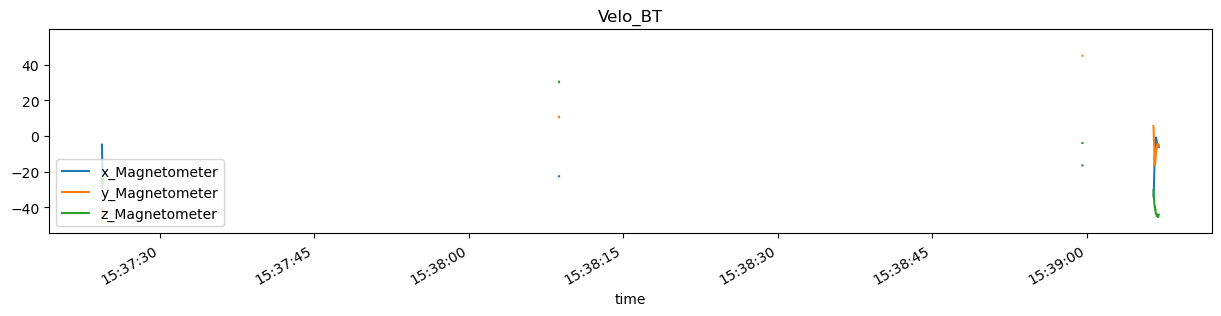

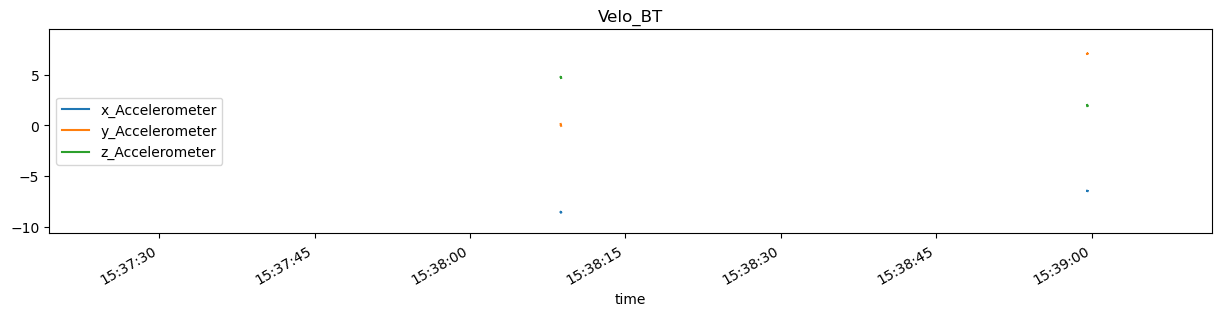

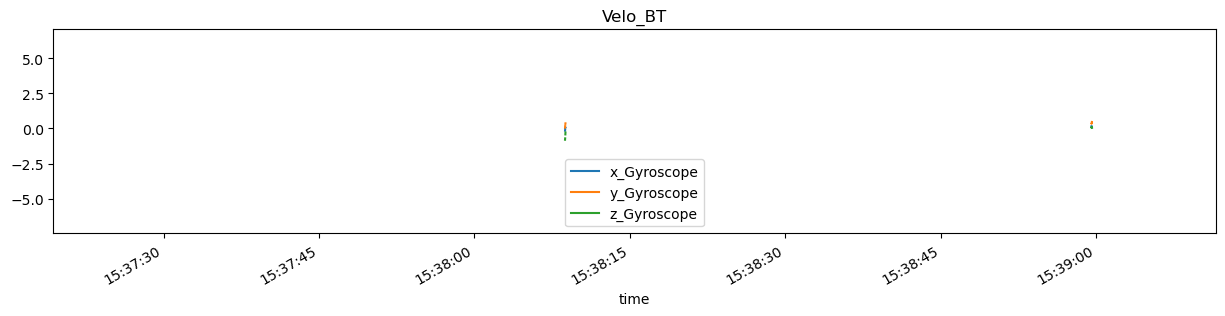

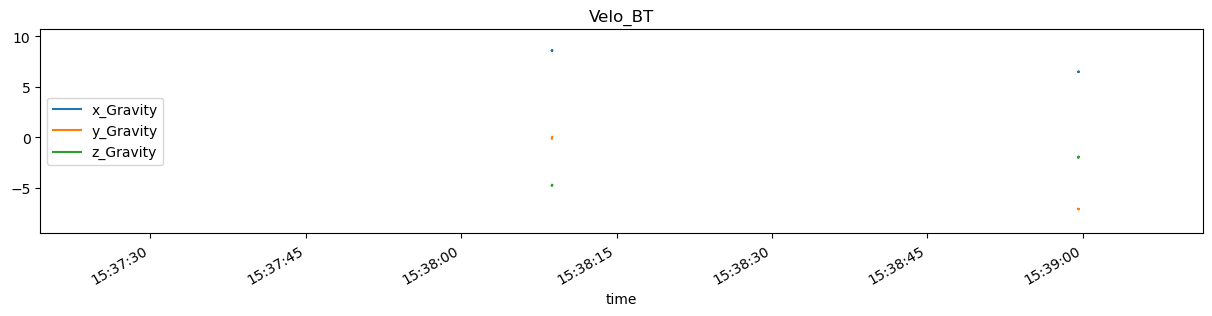

x_Magnetometer  y_Magnetometer  z_Magnetometer  \
time                                                                            
2023-02-27 15:37:24.401819648       -4.912500      -48.600002      -23.887501   
2023-02-27 15:37:24.411823872       -8.043751      -47.212502      -24.787500   
2023-02-27 15:37:24.421835520      -10.912500      -45.900002      -25.612501   
2023-02-27 15:37:24.431856128      -14.100000      -44.643753      -25.987501   
2023-02-27 15:37:24.441886976      -17.512501      -43.556252      -26.512501   
...                                       ...             ...             ...   
2023-02-27 15:39:06.941957120       -6.056250       -4.725000      -45.412502   
2023-02-27 15:39:06.951961344       -5.868750       -5.100000      -45.056252   
2023-02-27 15:39:06.961956864       -5.812500       -5.456250      -44.756252   
2023-02-27 15:39:06.971956992       -5.812500       -5.456250      -44.512501   
2023-02-27 15:39:06.981960448       -6.112500       -5.287500      -44.212502   

                               x_Accelerometer  y_Accelerometer  \
time                                                              
2023-02-27 15:37:24.401819648              NaN              NaN   
2023-02-27 15:37:24.411823872              NaN              NaN   
2023-02-27 15:37:24.421835520              NaN              NaN   
2023-02-27 15:37:24.431856128              NaN              NaN   
2023-02-27 15:37:24.441886976              NaN              NaN   
...                                        ...              ...   
2023-02-27 15:39:06.941957120              NaN              NaN   
2023-02-27 15:39:06.951961344              NaN              NaN   
2023-02-27 15:39:06.961956864              NaN              NaN   
2023-02-27 15:39:06.971956992              NaN              NaN   
2023-02-27 15:39:06.981960448              NaN              NaN   

                               z_Accelerometer  x_Gyroscope  y_Gyroscope  \
time                                                                       
2023-02-27 15:37:24.401819648              NaN          NaN          NaN   
2023-02-27 15:37:24.411823872              NaN          NaN          NaN   
2023-02-27 15:37:24.421835520              NaN          NaN          NaN   
2023-02-27 15:37:24.431856128              NaN          NaN          NaN   
2023-02-27 15:37:24.441886976              NaN          NaN          NaN   
...                                        ...          ...          ...   
2023-02-27 15:39:06.941957120              NaN          NaN          NaN   
2023-02-27 15:39:06.951961344              NaN          NaN          NaN   
2023-02-27 15:39:06.961956864              NaN          NaN          NaN   
2023-02-27 15:39:06.971956992              NaN          NaN          NaN   
2023-02-27 15:39:06.981960448              NaN          NaN          NaN   

                               z_Gyroscope  x_Gravity  y_Gravity  z_Gravity  \
time                                                                          
2023-02-27 15:37:24.401819648          NaN        NaN        NaN        NaN   
2023-02-27 15:37:24.411823872          NaN        NaN        NaN        NaN   
2023-02-27 15:37:24.421835520          NaN        NaN        NaN        NaN   
2023-02-27 15:37:24.431856128          NaN        NaN        NaN        NaN   
2023-02-27 15:37:24.441886976          NaN        NaN        NaN        NaN   
...                                    ...        ...        ...        ...   
2023-02-27 15:39:06.941957120          NaN        NaN        NaN        NaN   
2023-02-27 15:39:06.951961344          NaN        NaN        NaN        NaN   
2023-02-27 15:39:06.961956864          NaN        NaN        NaN        NaN   
2023-02-27 15:39:06.971956992          NaN        NaN        NaN        NaN   
2023-02-27 15:39:06.981960448          NaN        NaN        NaN        NaN   

                              activity userID  
time                                    

In [26]:
velo = read_json('01_SamsungA22-2023-02-27_15-37-24.json', 'Velo', 'BT')
vis_all_sensors(velo)
velo

In [11]:
test = pd.read_json('01_SamsungA22-2023-02-27_15-37-24.json')
test = test[test['sensor'].isin(sensor_lst)].dropna(how='all',axis=1)
#Test to wide table
test = test.set_index('time')
test = test.pivot(columns='sensor')
test = test.dropna(how='all',axis=1)
test = test.reset_index(drop=False)
display(test)

time seconds_elapsed                                 \
sensor                 Accelerometer Gravity Gyroscope Magnetometer   
0       1.677512e+18             NaN     NaN       NaN     0.100820   
1       1.677512e+18             NaN     NaN       NaN     0.110824   
2       1.677512e+18             NaN     NaN       NaN     0.120835   
3       1.677512e+18             NaN     NaN       NaN     0.130856   
4       1.677512e+18             NaN     NaN       NaN     0.140887   
...              ...             ...     ...       ...          ...   
20559   1.677512e+18             NaN     NaN       NaN   102.640957   
20560   1.677512e+18             NaN     NaN       NaN   102.650961   
20561   1.677512e+18             NaN     NaN       NaN   102.660957   
20562   1.677512e+18             NaN     NaN       NaN   102.670957   
20563   1.677512e+18             NaN     NaN       NaN   102.680960   

                   z                                            y          \
sensor Accelerometer Gravity Gyroscope Magnetometer Accelerometer Gravity   
0                NaN     NaN       NaN   -23.887501           NaN     NaN   
1                NaN     NaN       NaN   -24.787500           NaN     NaN   
2                NaN     NaN       NaN   -25.612501           NaN     NaN   
3                NaN     NaN       NaN   -25.987501           NaN     NaN   
4                NaN     NaN       NaN   -26.512501           NaN     NaN   
...              ...     ...       ...          ...           ...     ...   
20559            NaN     NaN       NaN   -45.412502           NaN     NaN   
20560            NaN     NaN       NaN   -45.056252           NaN     NaN   
20561            NaN     NaN       NaN   -44.756252           NaN     NaN   
20562            NaN     NaN       NaN   -44.512501           NaN     NaN   
20563            NaN     NaN       NaN   -44.212502           NaN     NaN   

                                          x                                 
sensor Gyroscope Magnetometer Accelerometer Gravity Gyroscope Magnetometer  
0            NaN   -48.600002           NaN     NaN       NaN    -4.912500  
1            NaN   -47.212502           NaN     NaN       NaN    -8.043751  
2            NaN   -45.900002           NaN     NaN       NaN   -10.912500  
3            NaN   -44.643753           NaN     NaN       NaN   -14.100000  
4            NaN   -43.556252           NaN     NaN       NaN   -17.512501  
...          ...          ...           ...     ...       ...          ...  
20559        NaN    -4.725000           NaN     NaN       NaN    -6.056250  
20560        NaN    -5.100000           NaN     NaN       NaN    -5.868750  
20561        NaN    -5.456250           NaN     NaN       NaN    -5.812500  
20562        NaN    -5.456250           NaN     NaN       NaN    -5.812500  
20563        NaN    -5.287500           NaN     NaN       NaN    -6.112500  

[20564 rows x 17 columns]

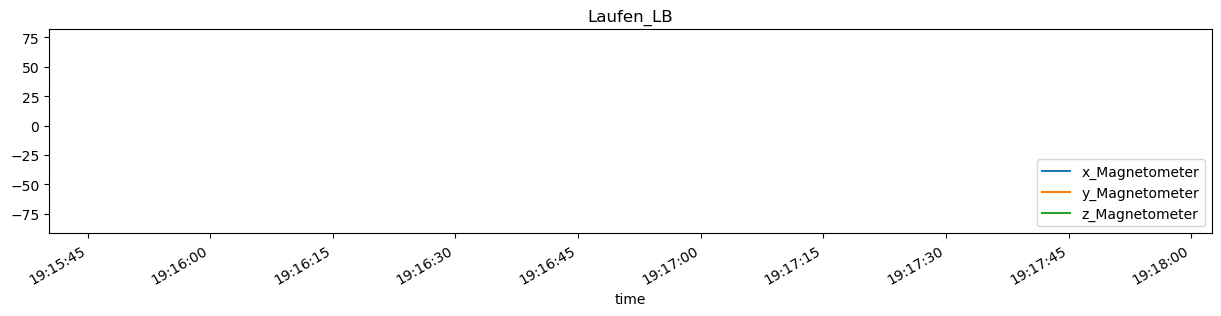

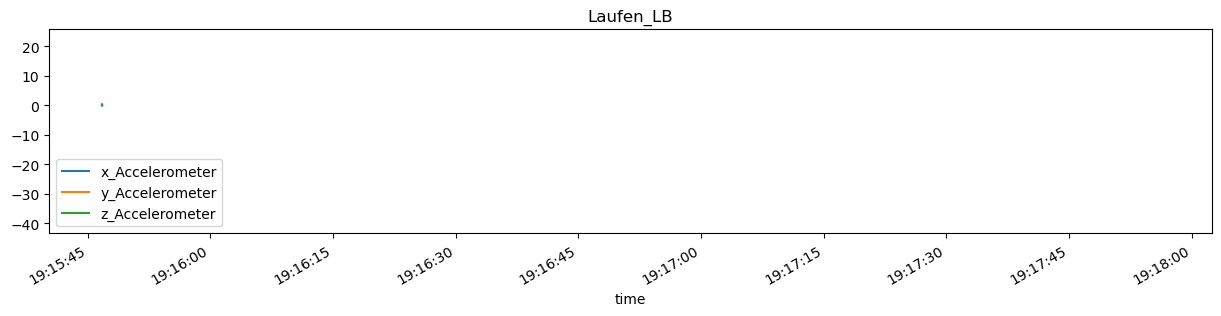

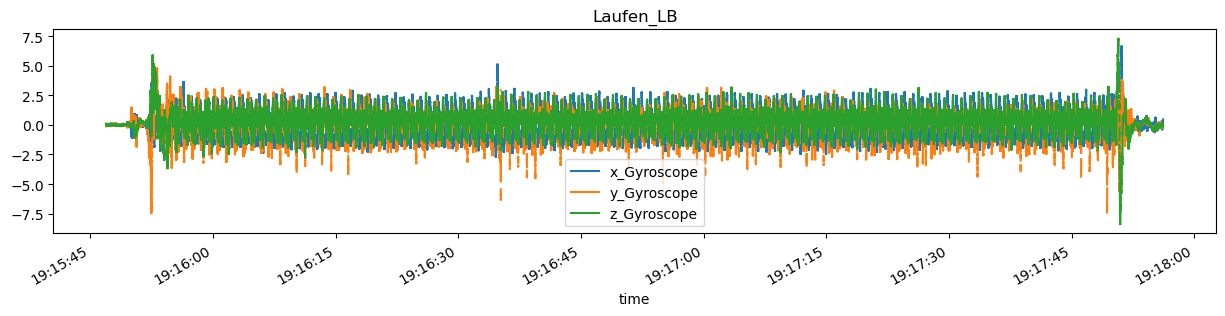

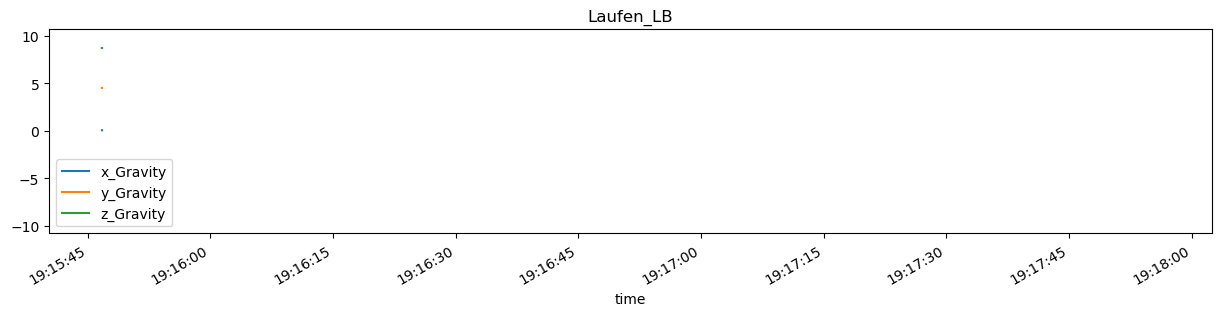

x_Magnetometer  y_Magnetometer  z_Magnetometer  \
time                                                                            
2023-03-03 19:15:46.731123968             NaN             NaN             NaN   
2023-03-03 19:15:46.741124096             NaN             NaN             NaN   
2023-03-03 19:15:46.751125504             NaN             NaN             NaN   
2023-03-03 19:15:46.757005568         -18.125         18.5625        -79.6875   
2023-03-03 19:15:46.761124096             NaN             NaN             NaN   
...                                       ...             ...             ...   
2023-03-03 19:17:56.160604160             NaN             NaN             NaN   
2023-03-03 19:17:56.162604032             NaN             NaN             NaN   
2023-03-03 19:17:56.164614912             NaN             NaN             NaN   
2023-03-03 19:17:56.166608640             NaN             NaN             NaN   
2023-03-03 19:17:56.168604160             NaN             NaN             NaN   

                               x_Accelerometer  y_Accelerometer  \
time                                                              
2023-03-03 19:15:46.731123968          -0.0872           0.4209   
2023-03-03 19:15:46.741124096          -0.0872           0.4209   
2023-03-03 19:15:46.751125504          -0.0872           0.4209   
2023-03-03 19:15:46.757005568              NaN              NaN   
2023-03-03 19:15:46.761124096          -0.0073          -0.0518   
...                                        ...              ...   
2023-03-03 19:17:56.160604160              NaN              NaN   
2023-03-03 19:17:56.162604032              NaN              NaN   
2023-03-03 19:17:56.164614912              NaN              NaN   
2023-03-03 19:17:56.166608640              NaN              NaN   
2023-03-03 19:17:56.168604160              NaN              NaN   

                               z_Accelerometer  x_Gyroscope  y_Gyroscope  \
time                                                                       
2023-03-03 19:15:46.731123968           0.1484          NaN          NaN   
2023-03-03 19:15:46.741124096           0.1484          NaN          NaN   
2023-03-03 19:15:46.751125504           0.1484          NaN          NaN   
2023-03-03 19:15:46.757005568              NaN          NaN          NaN   
2023-03-03 19:15:46.761124096          -0.0785          NaN          NaN   
...                                        ...          ...          ...   
2023-03-03 19:17:56.160604160              NaN     0.396190    -0.039567   
2023-03-03 19:17:56.162604032              NaN     0.417273    -0.035622   
2023-03-03 19:17:56.164614912              NaN     0.435320    -0.032114   
2023-03-03 19:17:56.166608640              NaN     0.451517    -0.029112   
2023-03-03 19:17:56.168604160              NaN     0.466945    -0.027576   

                               z_Gyroscope  x_Gravity  y_Gravity  z_Gravity  \
time                                                                          
2023-03-03 19:15:46.731123968          NaN     0.0577     4.5117     8.7069   
2023-03-03 19:15:46.741124096          NaN     0.0577     4.5117     8.7069   
2023-03-03 19:15:46.751125504          NaN     0.0577     4.5117     8.7069   
2023-03-03 19:15:46.757005568          NaN        NaN        NaN        NaN   
2023-03-03 19:15:46.761124096          NaN     0.7624     5.3866     8.1592   
...                                    ...        ...        ...        ...   
2023-03-03 19:17:56.160604160    -0.103969        NaN        NaN        NaN   
2023-03-03 19:17:56.162604032    -0.091647        NaN        NaN        NaN   
2023-03-03 19:17:56.164614912    -0.080006        NaN        NaN        NaN   
2023-03-03 19:17:56.166608640    -0.069272        NaN        NaN        NaN   
2023-03-03 19:17:56.168604160    -0.058591        NaN        NaN        NaN   

                              activity userID  
time                                    

In [27]:
laufen = read_json('01_Huawei_Laufen-2023-03-03_19-15-46.json', 'Laufen', 'LB')
vis_all_sensors(laufen)
laufen

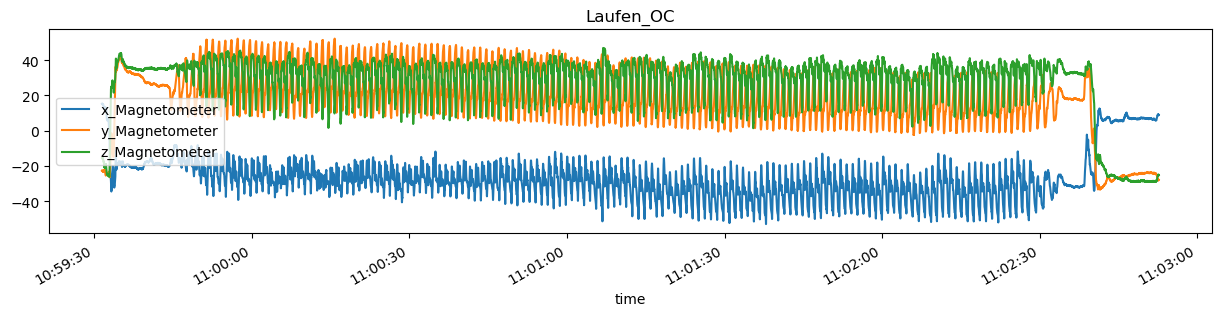

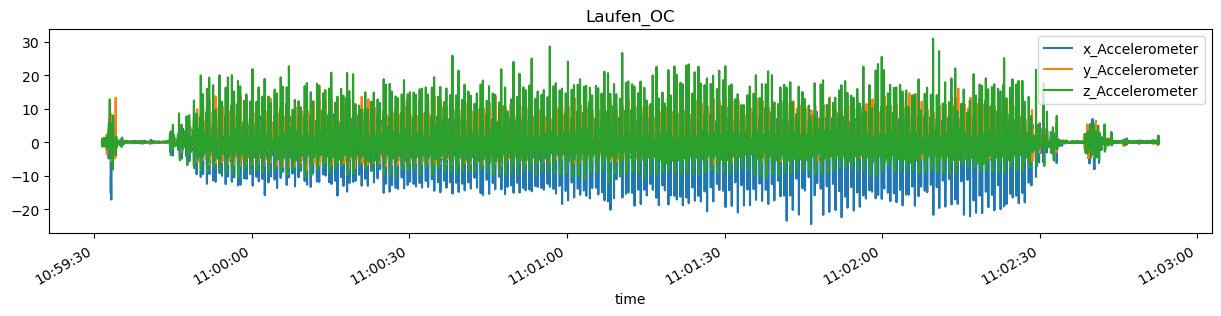

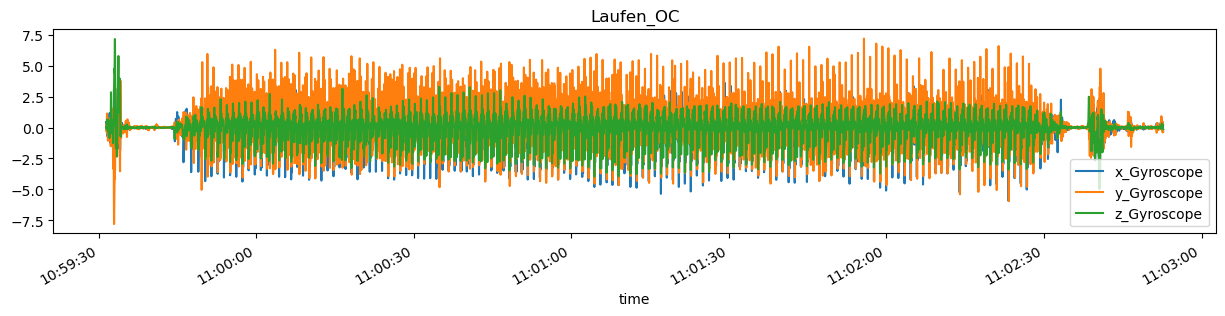

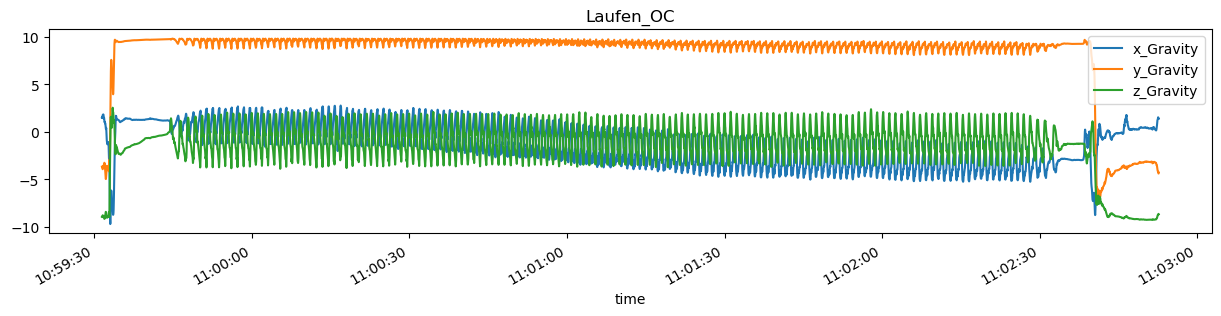

x_Magnetometer  y_Magnetometer  z_Magnetometer  \
time                                                                            
2023-03-22 10:59:31.448516352       15.224854      -22.711693      -15.373352   
2023-03-22 10:59:31.458528256       15.100723      -22.664513      -15.300262   
2023-03-22 10:59:31.468541440       15.080963      -22.654991      -15.392914   
2023-03-22 10:59:31.478553344       15.054825      -22.533268      -15.557861   
2023-03-22 10:59:31.488565504       15.164169      -22.501602      -15.349762   
...                                       ...             ...             ...   
2023-03-22 11:02:52.649421568        8.813721      -28.176220      -25.020630   
2023-03-22 11:02:52.659433472        8.619034      -28.216881      -25.161530   
2023-03-22 11:02:52.669445632        8.653992      -28.125896      -25.301697   
2023-03-22 11:02:52.679457536        8.759048      -28.066631      -25.487305   
2023-03-22 11:02:52.689469440        8.778442      -28.051697      -25.470337   

                               x_Accelerometer  y_Accelerometer  \
time                                                              
2023-03-22 10:59:31.448516352         0.216048         0.449038   
2023-03-22 10:59:31.458528256         0.262800         0.364062   
2023-03-22 10:59:31.468541440         0.339161         0.143393   
2023-03-22 10:59:31.478553344         0.379872        -0.073145   
2023-03-22 10:59:31.488565504         0.195315        -0.260409   
...                                        ...              ...   
2023-03-22 11:02:52.649421568         0.007595        -0.599200   
2023-03-22 11:02:52.659433472         0.031724        -0.750555   
2023-03-22 11:02:52.669445632         0.162433        -0.358180   
2023-03-22 11:02:52.679457536         0.271464        -0.086841   
2023-03-22 11:02:52.689469440         0.611743        -0.087547   

                               z_Accelerometer  x_Gyroscope  y_Gyroscope  \
time                                                                       
2023-03-22 10:59:31.448516352        -0.161543     0.432717     0.094414   
2023-03-22 10:59:31.458528256         0.222376     0.286294     0.193907   
2023-03-22 10:59:31.468541440         0.612378     0.124641     0.223932   
2023-03-22 10:59:31.478553344         0.835734    -0.012288     0.134596   
2023-03-22 10:59:31.488565504         0.873559    -0.088410    -0.038637   
...                                        ...          ...          ...   
2023-03-22 11:02:52.649421568         0.660013    -0.097794    -0.151189   
2023-03-22 11:02:52.659433472         0.289164    -0.205342    -0.071251   
2023-03-22 11:02:52.669445632        -0.128130    -0.260977    -0.023187   
2023-03-22 11:02:52.679457536        -0.430009    -0.286807     0.107449   
2023-03-22 11:02:52.689469440        -0.046440    -0.313867     0.208397   

                               z_Gyroscope  x_Gravity  y_Gravity  z_Gravity  \
time                                                                          
2023-03-22 10:59:31.448516352     0.018780   1.488923  -3.677020  -8.968446   
2023-03-22 10:59:31.458528256     0.039276   1.501128  -3.709958  -8.952832   
2023-03-22 10:59:31.468541440     0.069034   1.518290  -3.729159  -8.941954   
2023-03-22 10:59:31.478553344     0.089987   1.532048  -3.735132  -8.937114   
2023-03-22 10:59:31.488565504     0.081059   1.533298  -3.731474  -8.938427   
...                                    ...        ...        ...        ...   
2023-03-22 11:02:52.649421568     0.027891   1.343932  -4.401689  -8.659640   
2023-03-22 11:02:52.659433472    -0.014418   1.334467  -4.388150  -8.667972   
2023-03-22 11:02:52.669445632    -0.092438   1.332297  -4.367076  -8.678941   
2023-03-22 11:02:52.679457536    -0.145120   1.341031  -4.341535  -8.690403   
2023-03-22 11:02:52.689469440    -0.142628   1.361827  -4.313594  -8.701075   

                              activity userID  
time                                    

In [29]:
laufen = read_json('02_iPhone14-2023-03-22-2023-03-22_10-59-31.json', 'Laufen', 'OC')
vis_all_sensors(laufen)
laufen